In [1]:
from torchvision import datasets

data_path = '../data/p1ch7' #下載存放路徑
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)#產生訓練資料集物件(若資料未曾被下載至本機，TorchVision 便會進行下載)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) #當指定 Train=False 會下載驗證資料集

Files already downloaded and verified
Files already downloaded and verified


In [2]:
type(cifar10).__mro__  #先用 type() 取得所屬類別，再用 __mro__取得類別的繼承順序

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [3]:
len(cifar10)

50000

In [4]:
#建立一個 class_names 的字典
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
img, label = cifar10[99] #存取 cifar10 資料集中索引為 99 的項目
img, label, class_names[label]
#RGB 圖
#圖片大小 32x32
#類別索引 1
#索引對應的類別 automobile

(<PIL.Image.Image image mode=RGB size=32x32 at 0x24DCFCCF7B8>, 1, 'automobile')

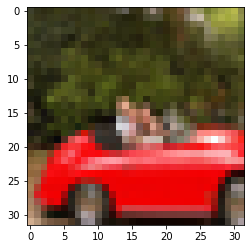

In [5]:
from matplotlib import pyplot as plt

plt.imshow(img)
plt.show()

In [6]:
from torchvision import transforms
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [7]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape #印出轉換出來的張量 shape C x H x W

torch.Size([3, 32, 32])

In [25]:
#將 ToTensor() 當成輸入參數
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [11]:
img_t, _ = tensor_cifar10[99] #將 tensor_cifar10 中索引為 99 的項目存入 img_t
type(img_t) #輸出 img_t 的資料類型

torch.Tensor

In [15]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [16]:
img_t.min(), img_t.max() #輸出 img_t 的最小值及最大值
#原始 PIL 圖片中，各像素質的範圍在 0~255 之間，經過 ToTensor 轉換後這些值會變成 32位元浮點數，範圍在 0.0~1.0 之間

(tensor(0.), tensor(1.))

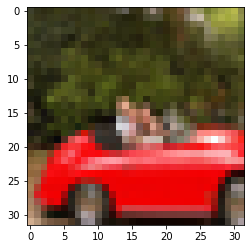

In [17]:
#確認張量代表的圖片和之前相同
plt.imshow(img_t.permute(1, 2, 0)) #將張量的 shape 從 C x H x W 改為 H x W x C，以符合 Matplotlib 的要求
plt.show()

In [18]:
import torch

#將所有圖片堆疊至一個額外的軸上，方便計算平均值和標準差
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3) #堆疊至第 3 軸
imgs.shape

torch.Size([3, 32, 32, 50000])

In [48]:
#計算每個通道的平均值
mean = imgs.view(3, -1).mean(dim=1)
mean
#view(3, -1)會指定保留第 0 軸(通道軸)，其餘軸的維度則合併在第 1 軸
#因此 原本為 3x32x32x50000 -> 3x51200000
#接著就可以沿著第 1 軸計算各個通道中元素的平均值

tensor([0.4914, 0.4822, 0.4465])

In [47]:
#計算每個通道的標準差
std = imgs.view(3, -1).std(dim=1)
std

tensor([0.2470, 0.2435, 0.2616])

In [113]:
transformed_cifar10 = datasets.CIFAR10( #對訓練資料集進行正規化
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(tuple(mean.tolist()), #個通道的平均值 (0.4914, 0.4822, 0.4465)
                             tuple(std.tolist())) #個通道的標準差 (0.2470, 0.2435, 0.2616)
    ]))

cifar10_val = datasets.CIFAR10( #對驗證資料集進行正規化
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(tuple(mean.tolist()), #驗證集必須使用和訓練集相同的平均值及標準差來正規化
                             tuple(std.tolist()))
    ]))
cifar10_val

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../data/p1ch7
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4913996458053589, 0.48215845227241516, 0.44653093814849854), std=(0.24703224003314972, 0.24348513782024384, 0.26158785820007324))
           )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


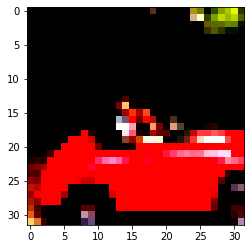

In [59]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

#某些 RGB 值會因為正規化而超出 0.0~1.0 的範圍，進而改變整個通道的數值量級，Matplotlib 會北超出範圍的像素以黑色表示

In [115]:
#7.2 區分鳥和飛機
label_map = {0: 0, 2: 1} #將飛機的類別標籤對應到 0 (原本為 0)；將小鳥的標籤對應到 1 (原本為 2)
class_name = ['airplane', 'bird']
cifar2 = [(img, label_map[label])  #取出原有訓練資料集中，飛機及小鳥的圖片
           for img, label in transformed_cifar10
           if label in [0, 2]]
cifar2_val = [(img, label_map[label]) #取出原有驗證資料集中，飛機及小鳥的圖片
               for img, label in cifar10_val
               if label in [0, 2]]


[(tensor([[[ 0.4714,  0.6619,  0.8047,  ...,  1.2016,  1.2175,  1.0587],
           [ 0.4396,  0.5984,  0.7254,  ...,  1.2175,  1.2334,  1.0111],
           [ 0.4714,  0.5507,  0.6777,  ...,  1.2810,  1.2492,  1.0111],
           ...,
           [-0.5764, -1.0844, -1.0209,  ..., -0.5764, -1.0526, -0.9256],
           [-0.5764, -1.0367, -0.9891,  ..., -1.0844, -1.0209, -0.7986],
           [-0.5287, -1.0367, -1.0209,  ..., -1.0367, -0.9732, -0.8304]],
  
          [[ 0.5323,  0.8544,  0.9027,  ...,  1.1765,  1.2732,  0.9672],
           [ 0.5162,  0.9027,  0.9833,  ...,  1.3698,  1.4825,  1.0799],
           [ 0.5001,  0.8866,  0.9994,  ...,  1.3698,  1.4825,  1.0960],
           ...,
           [-0.7079, -1.1266, -0.9978,  ..., -0.0636, -0.7079, -0.7884],
           [-0.6595, -1.0461, -0.9172,  ..., -0.9172, -0.9495, -0.8689],
           [-0.7240, -1.1427, -1.0461,  ..., -0.9656, -0.9333, -0.8850]],
  
          [[ 0.5267,  1.0964,  1.1863,  ...,  1.4262,  1.4712,  0.8565],
           

In [61]:
import torch.nn as nn

n_out = 2
#一張圖片的 shape 為 32x32x5 = 3072
model = nn.Sequential( 
    nn.Linear(3072, 512), #(輸入特徵數, 隱藏層大小(輸出特徵數))
    nn.Tanh(),
    nn.Linear(512, n_out) #(上一層隱藏層的大小(輸入特徵數), 輸出特徵數(類別數量))
)

In [62]:
#softmax 介紹
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum() #使用 exp() 可將輸入元素指數化

In [63]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [64]:
softmax(x).sum()

tensor(1.)

In [66]:
softmax = nn.Softmax(dim=1) #將 softmax 函數套用在第 1 軸(沿著同一列不同行)
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [68]:
model = nn.Sequential( 
    nn.Linear(3072, 512), #(輸入特徵數, 隱藏層大小(輸出特徵數))
    nn.Tanh(),
    nn.Linear(512, n_out), #(上一層隱藏層的大小(輸入特徵數), 輸出特徵數(類別數量))
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


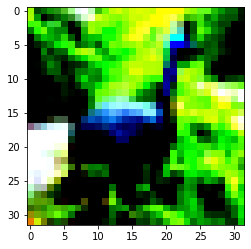

In [88]:
#取出一個鳥類的圖片
img, label = cifar2[0] #取出 cifar2 中索引為 0 的圖片
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [75]:
img_batch = img.view(-1).unsqueeze(0) #轉為 1D 張量，並在第 0 軸加入一個軸(批次軸)

In [78]:
out = model(img_batch)
out
#(飛機的機率, 小鳥的機率)

tensor([[0.5194, 0.4806]], grad_fn=<SoftmaxBackward>)

In [80]:
_, index = torch.max(out, dim=1)
index #代筆索引為 0 的類別有較高的機率值

tensor([0])

In [81]:
#當機率值趨近於 0 時，機率的對數運算並不容易
#故用 nn.LogSoftmax 取代 nn.Softmax
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim=1))

In [83]:
#使用 NLL 當作 loss function 的原因可以看 readme '分類任務的損失'
loss = nn.NLLLoss()

In [92]:
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label])) #(模型的輸出(模型預測的類別), 標籤張量(實際的類別))
#該張圖片的 loss

tensor(0.6727, grad_fn=<NllLossBackward>)

In [100]:
import torch
import torch.nn as nn

model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim=1))
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
model.cuda()
for epoch in range(1, n_epochs + 1):
    for img, label in cifar2:
        #img = to_tensor(img)
        out = model(img.view(-1).unsqueeze(0).cuda())
        loss = loss_fn(out, torch.tensor([label]).cuda())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss))) #每個迴圈結束後，將損失列印出來

Epoch: 1, Loss: 3.657701
Epoch: 2, Loss: 7.734653
Epoch: 3, Loss: 7.277421
Epoch: 4, Loss: 6.433657
Epoch: 5, Loss: 4.560909
Epoch: 6, Loss: 3.761770
Epoch: 7, Loss: 5.347052
Epoch: 8, Loss: 5.999678
Epoch: 9, Loss: 5.182169
Epoch: 10, Loss: 13.533284
Epoch: 11, Loss: 12.178890
Epoch: 12, Loss: 13.856009
Epoch: 13, Loss: 13.005776
Epoch: 14, Loss: 14.879878
Epoch: 15, Loss: 7.980108
Epoch: 16, Loss: 9.218361
Epoch: 17, Loss: 9.431400
Epoch: 18, Loss: 12.953390
Epoch: 19, Loss: 8.776795
Epoch: 20, Loss: 9.046886
Epoch: 21, Loss: 9.737998
Epoch: 22, Loss: 13.546719
Epoch: 23, Loss: 5.987009
Epoch: 24, Loss: 15.226848
Epoch: 25, Loss: 0.945708
Epoch: 26, Loss: 5.439361
Epoch: 27, Loss: 13.032988
Epoch: 28, Loss: 3.596389
Epoch: 29, Loss: 5.945474
Epoch: 30, Loss: 10.978158
Epoch: 31, Loss: 5.462500
Epoch: 32, Loss: 7.620357
Epoch: 33, Loss: 7.023579
Epoch: 34, Loss: 10.323459
Epoch: 35, Loss: 7.247010
Epoch: 36, Loss: 2.197041
Epoch: 37, Loss: 4.003651
Epoch: 38, Loss: 0.091276
Epoch: 39,

In [101]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True) #(Dataset 物件, batch_size, 是否shuffle)

In [103]:
import torch
import torch.nn as nn
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim=1))
learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(1, n_epochs + 1):
    train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        ouputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(ouputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss))) #列印隨機批次的損失值

Epoch: 1, Loss: 0.458832
Epoch: 2, Loss: 0.360959
Epoch: 3, Loss: 0.337442
Epoch: 4, Loss: 0.474414
Epoch: 5, Loss: 0.284036
Epoch: 6, Loss: 0.637692
Epoch: 7, Loss: 0.365148
Epoch: 8, Loss: 0.428012
Epoch: 9, Loss: 0.304736
Epoch: 10, Loss: 0.101204
Epoch: 11, Loss: 0.422641
Epoch: 12, Loss: 0.599496
Epoch: 13, Loss: 0.428802
Epoch: 14, Loss: 0.251898
Epoch: 15, Loss: 0.128701
Epoch: 16, Loss: 0.252184
Epoch: 17, Loss: 0.813117
Epoch: 18, Loss: 0.188774
Epoch: 19, Loss: 0.093462
Epoch: 20, Loss: 0.330955
Epoch: 21, Loss: 0.397122
Epoch: 22, Loss: 0.281201
Epoch: 23, Loss: 0.451693
Epoch: 24, Loss: 0.241367
Epoch: 25, Loss: 0.236286
Epoch: 26, Loss: 0.265260
Epoch: 27, Loss: 0.129476
Epoch: 28, Loss: 0.184035
Epoch: 29, Loss: 0.122960
Epoch: 30, Loss: 0.201434
Epoch: 31, Loss: 0.113781
Epoch: 32, Loss: 0.220073
Epoch: 33, Loss: 0.259447
Epoch: 34, Loss: 0.157985
Epoch: 35, Loss: 0.198851
Epoch: 36, Loss: 0.131833
Epoch: 37, Loss: 0.129113
Epoch: 38, Loss: 0.051546
Epoch: 39, Loss: 0.09

In [116]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f" %(correct/total))

Accuracy: 0.819500


In [117]:
model = nn.Sequential(nn.Linear(3072, 1024),
                      nn.Tanh(),
                      nn.Linear(1024, 512),
                      nn.Tanh(),
                      nn.Linear(512, 128),
                      nn.Tanh(),
                      nn.Linear(128, 2),
                      nn.LogSoftmax(dim=1))

In [120]:
model = nn.Sequential(nn.Linear(3072, 1024),
                      nn.Tanh(),
                      nn.Linear(1024, 512),
                      nn.Tanh(),
                      nn.Linear(512, 128),
                      nn.Tanh(),
                      nn.Linear(128, 2),
                      nn.LogSoftmax(dim=1))
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [134]:
def training(n_epochs, model, loss_fn, optimizer, training_dataset, batch_size):
    model.train()
    model.cuda()
    for epoch in range(1, n_epochs + 1):
        train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
        for imgs, labels in train_loader:
            outputs = model(imgs.view(imgs.shape[0], -1).cuda())
            loss = loss_fn(outputs, labels.cuda())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("Epoch: %d, Loss: %f" %(epoch, float(loss)))

In [140]:
def valid(model, val_dataset, batch_size):
    model.eval()
    model.cuda()
    val_dataload = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    correct = 0
    total = 0
    for imgs, labels in val_dataload:
        outputs = model(imgs.view(imgs.shape[0], -1).cuda())
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += ((labels.cuda()==predicted).sum())
    print("Accuracy: %f" %(correct/total))

In [135]:
training(
    n_epochs = 100,
    model = model, 
    loss_fn = loss_fn, 
    optimizer=optimizer, 
    training_dataset = cifar2, 
    batch_size = 64
)

Epoch: 1, Loss: 0.415512
Epoch: 2, Loss: 0.502933
Epoch: 3, Loss: 0.246457
Epoch: 4, Loss: 0.216020
Epoch: 5, Loss: 0.373521
Epoch: 6, Loss: 0.278312
Epoch: 7, Loss: 0.323613
Epoch: 8, Loss: 0.679636
Epoch: 9, Loss: 0.158985
Epoch: 10, Loss: 0.289258
Epoch: 11, Loss: 0.402988
Epoch: 12, Loss: 0.226196
Epoch: 13, Loss: 0.490454
Epoch: 14, Loss: 0.796133
Epoch: 15, Loss: 0.389707
Epoch: 16, Loss: 0.228143
Epoch: 17, Loss: 0.175575
Epoch: 18, Loss: 0.233636
Epoch: 19, Loss: 0.211898
Epoch: 20, Loss: 0.545009
Epoch: 21, Loss: 0.103301
Epoch: 22, Loss: 0.107578
Epoch: 23, Loss: 0.643781
Epoch: 24, Loss: 0.158867
Epoch: 25, Loss: 0.300800
Epoch: 26, Loss: 0.141384
Epoch: 27, Loss: 0.153180
Epoch: 28, Loss: 0.084489
Epoch: 29, Loss: 0.485070
Epoch: 30, Loss: 0.360804
Epoch: 31, Loss: 0.075814
Epoch: 32, Loss: 0.189612
Epoch: 33, Loss: 0.210112
Epoch: 34, Loss: 0.281657
Epoch: 35, Loss: 0.175857
Epoch: 36, Loss: 0.064996
Epoch: 37, Loss: 0.077283
Epoch: 38, Loss: 0.215019
Epoch: 39, Loss: 0.06

In [141]:
valid(
    model = model, 
    val_dataset = cifar2_val, 
    batch_size = 64
)

Accuracy: 0.802500


In [145]:
#計算模型可訓練參數
numel_list = [
    p.numel()
    for p in model.parameters()
    if p.requires_grad == True #只計算可訓練參數的數量
]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])